---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 3 _ part 1
##               warning : this will take 10 mins if you rerun it 

---

Please write your full name here
- **Name** : "Andrew Mushen"
- **BN**   : 15

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')


## data preparation

In [2]:
from sklearn.model_selection import GridSearchCV, train_test_split, ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time


cardio_DataSet = pd.read_csv('cardio_train.csv', sep=';')
del cardio_DataSet["id"]
cardio_DataSet.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
"""
this the 2-d correlation between features 
"""
cardio_DataSet.corr()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330


## checking features correlations

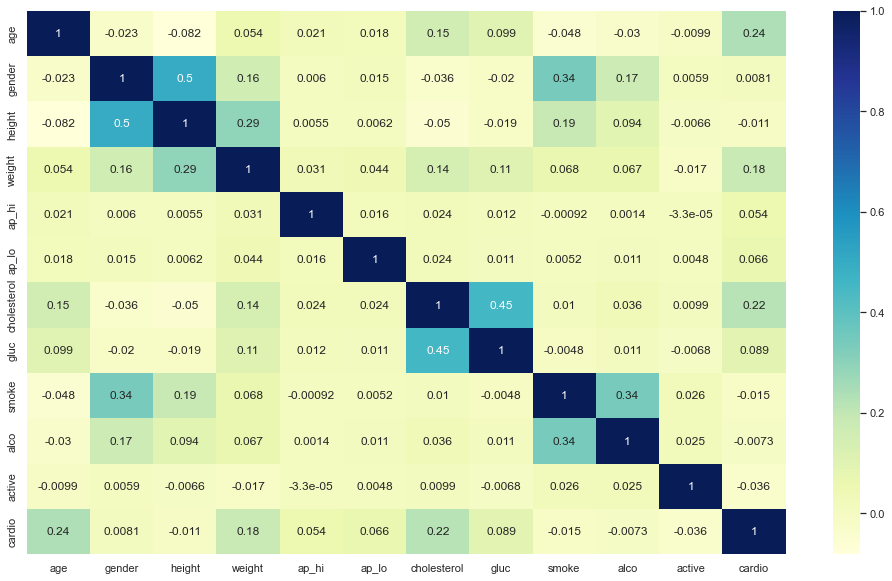

In [4]:
# the heat map of the corrlations Better visualization
sns.set(rc={'figure.figsize': (17, 10)})
dataplot = sns.heatmap(cardio_DataSet.corr(), cmap="YlGnBu", annot=True)


### it's shown here that [age, cholestrol, weight] are the most important features but i will try to confrim this using diff methode.


In [5]:
x = cardio_DataSet[cardio_DataSet.columns[:-1]]
y = cardio_DataSet.cardio


## calculating features weights using slectKbest()

In [6]:
fit_feature = SelectKBest()
fit_feature.fit(x, y)
score_col = pd.DataFrame(fit_feature.scores_, columns=['score value'])
name_col = pd.DataFrame(x.columns)
top_feature = pd.concat([name_col, score_col],
                        axis=1).nlargest(11, 'score value')
top_feature


,0,score value
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541
2,height,8.197397
1,gender,4.603641


## removing un-needed features

In [7]:
feature_selected_X = cardio_DataSet[cardio_DataSet.columns[:-1]
                                    ].drop(['gender', 'alco'], axis=1)
#feature_selected_X = cardio_DataSet[cardio_DataSet.columns[:-1]].drop(['smoke','gender','alco','height','active'],axis=1)

xtrain, xtest, ytrain, ytest = train_test_split(
    feature_selected_X, y, train_size=0.65, random_state=0)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

feature_selected_X.shape


(70000, 9)

## Applying Logistic regression with gridsearch to maximize performance

In [8]:
logistic = LogisticRegression()
param_dict_log = {
    "penalty": ['l1', 'l2', 'none'],
    "solver": ['newton-cg', 'lbfgs'],
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
# "C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
# "C" : [ 0.01, 0.1, 1, 10]

logistic_grid_start = time.time()

logistic_grid = GridSearchCV(
    logistic,
    param_dict_log,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1)

logistic_grid.fit(xtrain, ytrain)
logistic_grid_stop = time.time()


print("done")


Fitting 10 folds for each of 48 candidates, totalling 480 fits
done


In [9]:
logistic_tunned = LogisticRegression(
    penalty=logistic_grid.best_estimator_.get_params()['penalty'],
    solver=logistic_grid.best_estimator_.get_params()['solver'],
    C=logistic_grid.best_estimator_.get_params()['C'])

fit_start_logistic = time.time()
logistic_best_model = logistic_tunned.fit(xtrain, ytrain)
fit_stop_logistic = time.time()

train_score_start_logistic = time.time()
logistic_train_score = logistic_best_model.score(xtrain, ytrain)
train_score_stop_logistic = time.time()

test_score_start_logistic = time.time()
logistic_test_score = logistic_best_model.score(xtest, ytest)
test_score_stop_logistic = time.time()

prediction_start_logistic = time.time()
logistic_y_predicted = logistic_best_model.predict(xtest)
prediction_stop_logistic = time.time()

pg_logistic = ParameterGrid(param_dict_log)
number_of_fits_logistic = len(pg_logistic)*10


## Applying KNN classification with gridsearch to maximize performance

In [10]:
knn = KNeighborsClassifier()

param_dict_knn = {
    "n_neighbors": range(1, 15)
}

knn_grid_start = time.time()

Knn_grid = GridSearchCV(
    knn,
    param_dict_knn,
    cv=10,
    scoring='accuracy',
    return_train_score=False,
    verbose=1)

Knn_grid.fit(xtrain, ytrain)
knn_grid_stop = time.time()


Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [11]:
knn_tunned = KNeighborsClassifier(
    n_neighbors=Knn_grid.best_estimator_.get_params()['n_neighbors'])

fit_start_knn = time.time()
knn_best_model = knn_tunned.fit(xtrain, ytrain)
fit_stop_knn = time.time()

train_score_start_Knn = time.time()
Knn_train_score = knn_best_model.score(xtrain, ytrain)
train_score_stop_Knn = time.time()

test_score_start_knn = time.time()
Knn_test_score = knn_best_model.score(xtest, ytest)
test_score_stop_knn = time.time()

prediction_start_knn = time.time()
Knn_y_predicted = knn_best_model.predict(xtest)
prediction_stop_knn = time.time()

pg_knn = ParameterGrid(param_dict_knn)
number_of_fits_KNN = len(pg_knn)*10


## Applying Desision Tree classifier with gridsearch to maximize performance

In [12]:
ID3_classifier = DecisionTreeClassifier()

param_dict_ID3 = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1, 10),
    "min_samples_split": range(1, 5),
    "max_leaf_nodes": range(1, 10)
}

ID3_grid = GridSearchCV(
    ID3_classifier,
    param_grid=param_dict_ID3,
    cv=10,
    verbose=1,
    n_jobs=-1,
    return_train_score=False,
    scoring='accuracy'
)
ID3_grid_start = time.time()
ID3_grid.fit(xtrain, ytrain)
ID3_grid_stop = time.time()


Fitting 10 folds for each of 648 candidates, totalling 6480 fits


In [13]:
ID3_tunned = DecisionTreeClassifier(
    max_depth=ID3_grid.best_estimator_.get_params()['max_depth'],
    criterion=ID3_grid.best_estimator_.get_params()['criterion'],
    max_leaf_nodes=ID3_grid.best_estimator_.get_params()['max_leaf_nodes'],
    min_samples_split=ID3_grid.best_estimator_.get_params()[
        'min_samples_split']
)

fit_start_ID3 = time.time()
ID3_best_model = ID3_tunned.fit(xtrain, ytrain)
fit_stop_ID3 = time.time()

train_score_start_ID3 = time.time()
ID3_train_score = ID3_best_model.score(xtrain, ytrain)
train_score_stop_ID3 = time.time()

test_score_start_ID3 = time.time()
ID3_test_score = ID3_best_model.score(xtest, ytest)
test_score_stop_ID3 = time.time()

prediction_start_ID3 = time.time()
ID3_y_predicted = ID3_best_model.predict(xtest)
prediction_stop_ID3 = time.time()

pg_ID3 = ParameterGrid(param_dict_ID3)
number_of_fits_ID3 = len(pg_ID3)*10


## visualize the tree

'\nfeatures are normalized\n'

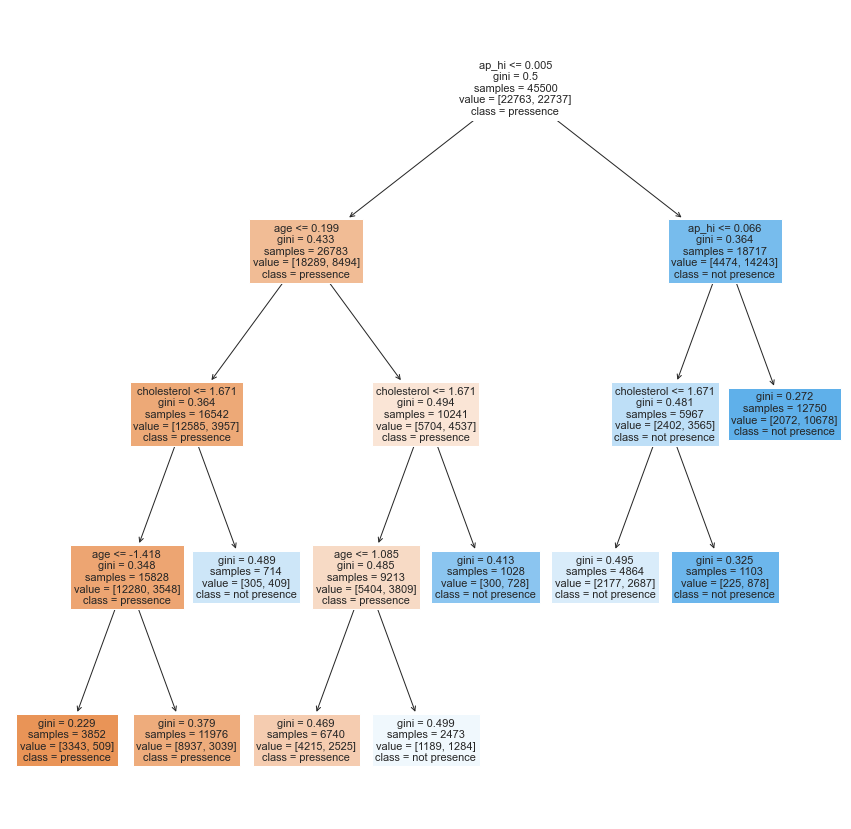

In [20]:
features_names= feature_selected_X.columns[:-1]
#features_names = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol','gluc', 'smoke', 'alco', 'active', 'cardio']

class_names = ['pressence', 'not presence']

text_rep = tree.export_text(ID3_best_model)

fig = plt.figure(figsize=(15, 15))
_ = tree.plot_tree(ID3_best_model,
                   feature_names=features_names,
                   class_names=class_names,
                   filled=True)
"""
features are normalized
"""


## logistic model info

In [15]:
print('Best penalty:', logistic_grid.best_estimator_.get_params()['penalty'])
print('Best solver:', logistic_grid.best_estimator_.get_params()['solver'])
print('Best C:', logistic_grid.best_estimator_.get_params()['C'])
print("Training Score =", logistic_train_score)
print("the test score[performance] =", logistic_test_score)

print(f"Fitting time = {fit_stop_logistic - fit_start_logistic}s")
print(
    f"traning score time = {train_score_stop_logistic - train_score_start_logistic}s")
print(
    f"testing score time = {test_score_stop_logistic - test_score_start_logistic}s")
print(
    f"prediction time = {prediction_stop_logistic - prediction_start_logistic}s")

print(f"Tunning time for the gridsearch was {logistic_grid_stop - logistic_grid_start}s",
      f"took to perform {number_of_fits_logistic} fits/iterations")


Best penalty: l2
Best solver: newton-cg
Best C: 10
Training Score = 0.7227912087912088
the test score[performance] = 0.7186938775510204
Fitting time = 0.3675367832183838s
traning score time = 0.0058557987213134766s
testing score time = 0.0019526481628417969s
prediction time = 0.0009756088256835938s
Tunning time for the gridsearch was 30.02120327949524s took to perform 480 fits/iterations


## knn model info

In [16]:
print('Best n_neighbors:',
      Knn_grid.best_estimator_.get_params()['n_neighbors'])
print("Training Score =", Knn_train_score)
print("the test score[performance] =", Knn_test_score)

print(f"Fitting time = {fit_stop_knn - fit_start_knn}s")
print(f"traning score time = {train_score_stop_Knn - train_score_start_Knn}s")
print(f"testing score time = {test_score_stop_knn - test_score_start_knn}s")
print(f"prediction time = {prediction_stop_knn - prediction_start_knn}s")

print(f"Tunning time for the gridsearch was {knn_grid_stop - knn_grid_start}s",
      f"took to perform {number_of_fits_KNN} fits/iterations")


Best n_neighbors: 13
Training Score = 0.7223076923076923
the test score[performance] = 0.6684897959183673
Fitting time = 0.09790420532226562s
traning score time = 11.469462633132935s
testing score time = 9.162973165512085s
prediction time = 7.496231555938721s
Tunning time for the gridsearch was 125.20827412605286s took to perform 140 fits/iterations


## ID3 model info 

In [17]:
print('Best Criterion:', ID3_grid.best_estimator_.get_params()['criterion'])
print('Best max_depth:', ID3_grid.best_estimator_.get_params()['max_depth'])
print('Best max_leaf_nodes:',
      ID3_grid.best_estimator_.get_params()['max_leaf_nodes'])
print('Best min_samples_split:',
      ID3_grid.best_estimator_.get_params()['min_samples_split'])

print("Training Score =", ID3_train_score)
print("the test score[performance] =", ID3_test_score)
print(f"Fitting time = {fit_stop_ID3 - fit_start_ID3}s")
print(f"traning score time = {train_score_stop_ID3 - train_score_start_ID3}s")
print(f"testing score time = {test_score_stop_ID3 - test_score_start_ID3}s")
print(f"prediction time = {prediction_stop_ID3 - prediction_start_ID3}s")

print(f"Tunning time for the gridsearch was {ID3_grid_stop - ID3_grid_start}s",
      f"took to perform {number_of_fits_ID3} fits/iterations")


Best Criterion: gini
Best max_depth: 4
Best max_leaf_nodes: 9
Best min_samples_split: 2
Training Score = 0.7287692307692307
the test score[performance] = 0.7282448979591837
Fitting time = 0.047821998596191406s
traning score time = 0.010736942291259766s
testing score time = 0.0039026737213134766s
prediction time = 0.001973867416381836s
Tunning time for the gridsearch was 137.1246190071106s took to perform 6480 fits/iterations


# notice


### the knn methode peroforms better the the K increases but the perfromance is much much worse it takes alot of time to compute anythin

### the logestice and ID3_decsion calssifer tree perfomce almost alike but IDE has higher and faster performance considering the number of iterations done

#### ID3 tree has accuracy of 0.728 very fast performance

#### knn has accuracy of 0.668 very slow

#### logistic regression has accuracy of 0.719 almost as good as the ID3

## in conclusion ID3 classifier performs relatively well on these data set with thte acc of 0.728 and remarkable combitional time
